<a href="https://colab.research.google.com/github/WENKAITAN/CMP414765Spring2022/blob/main/Week07_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. <font color="green">Polynomial Regression</font>
**Polynomial regression** extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power.

### <font color="green">Polynomial Regression with One Feature</font>
- Model Assumption: 
$$Y \approx \beta_0 + \beta_1X + \beta_2X^2 + \cdots + \beta_d X^d$$
- Least Squares Cost Function:
$$MSE(\beta) = \sum_{i=1}^N(y_i - \beta_0 - \beta_1x_i - \cdots - \beta_dx_i^d)^2 = (\textbf{y} - \textbf{X}\beta)^T(\textbf{y} - \textbf{X}\beta)$$
    - $$\textbf{X} = \begin{pmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^d \\
    1 & x_2 & x_2^2 & \cdots & x_2^d \\
    1 & \vdots & \vdots & \ddots & \vdots \\
    1 & x_N & x_N^2 & \cdots & x_N^d \\
    \end{pmatrix}, 
    y=\begin{pmatrix}
    y_1\\
    y_2\\
    \vdots\\
    y_N
    \end{pmatrix}$$
- Normal equation still applies:
$$
\hat{\beta} = argmin_\beta MSE(\beta) = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}
$$
- Simply put, polynomial regression is multilinear regression on $(X, X^2, ..., X^d)$.
- It is rarely necessary to consider $d>4$, since higher order terms make the polynomial overly flexible and tends to explode near the bounary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv",
                 usecols=['age', 'wage'])
df.head()

,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154


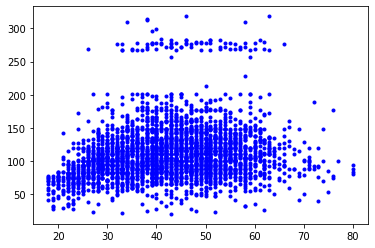

In [3]:
plt.plot(df["age"], df["wage"],"b.")

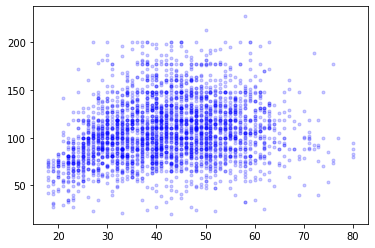

In [4]:
df = df[df["wage"] < 250]
plt.plot(df["age"], df["wage"],"b.", alpha=0.2)


In [5]:
X = df[['age']]
y = df[['wage']]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#use a linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [8]:
print(model.coef_)
model.intercept_

beta0 = model.intercept_
beta1= model.coef_[0]

[[0.57324783]]


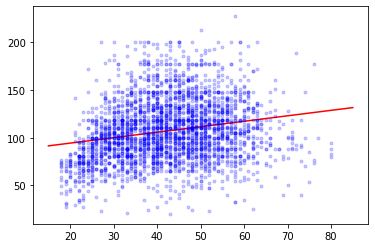

In [9]:
x_coordinates = [15, 85]
y_coordinates = [beta0 + x*beta1 for x in x_coordinates ]
y_coordinates 

plt.plot(x_coordinates, y_coordinates, "r-")
plt.plot(df["age"], df["wage"],"b.", alpha=0.2)

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, y_train_pred)

MSE_test = mean_squared_error(y_test, y_test_pred)

print(MSE_train, MSE_test )
print("Root MSE test: ", MSE_test**(1/2))

979.7252242651025 959.8691693125301
Root MSE test:  30.98175542658179


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca15bfe310>]],
      dtype=object)

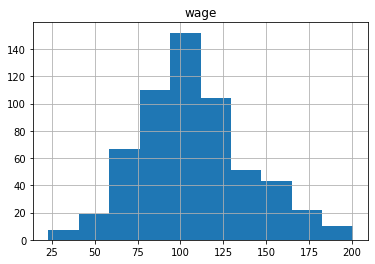

In [12]:
y_test.hist()

In [13]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_multi_trans = poly.fit_transform(X_train)
# print("Input",poly.n_input_features_)
# print("Ouput",poly.n_output_features_)
# print("Powersn",poly.powers_)
X_multi_trans

array([[  37., 1369.],
       [  51., 2601.],
       [  47., 2209.],
       ...,
       [  33., 1089.],
       [  35., 1225.],
       [  37., 1369.]])

In [14]:
model2 = LinearRegression()

model2.fit(X_multi_trans, y_train)

LinearRegression()

In [15]:
print(model2.intercept_)
model2.coef_

[1.20640038]


array([[ 4.65767486, -0.04735597]])

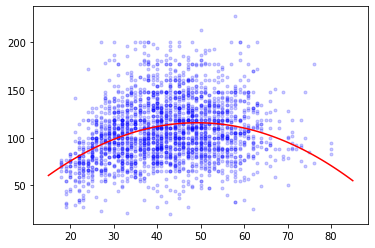

In [16]:

import numpy as np
plt.plot(X_train, y_train, "b.", alpha=0.2)
x_coor = np.linspace(15,85, 100)

beta0 = model2.intercept_
beta1, beta2= model2.coef_[0][0], model2.coef_[0][1]

y_coor = [beta0 + beta1 *x + beta2 * x**2 for x in x_coor]

plt.plot(x_coor, y_coor, "r-")

In [17]:
X_test_multi_trans = poly.fit_transform(X_test[['age']])

y_pred = model2.predict(X_test_multi_trans)
mean_squared_error(y_test, y_pred)

902.1043937507898

### <font color="green">Overfitting vs. Underfitting</font>
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171229/overfitting_1.png" width="600">
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png" width="600">

How to detect model overfitting?
- Training error vs. test error
- Cross Validation
- Model visualization

### <font color="green">Preventing Model Overfitting</font>
- Get more training data
- Feature selection
- Regularization
- Early stopping

<img src="https://hackernoon.com/hn-images/1*vuZxFMi5fODz2OEcpG-S1g.png" width="600">